In [1]:
import networkx

In [ ]:
# nice resource - datasets: https://networkrepository.com/index.php

In [2]:
# Super nice resource to look at: 
# https://python.igraph.org/en/stable/tutorials/index.html

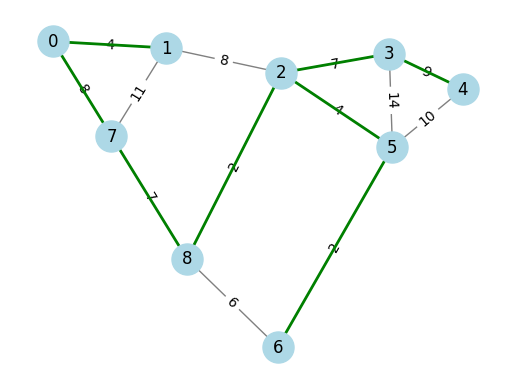

In [2]:
# Minimum spanning tree
# https://networkx.org/documentation/stable/auto_examples/graph/plot_mst.html#sphx-glr-auto-examples-graph-plot-mst-py
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edges_from(
    [
        (0, 1, {"weight": 4}),
        (0, 7, {"weight": 8}),
        (1, 7, {"weight": 11}),
        (1, 2, {"weight": 8}),
        (2, 8, {"weight": 2}),
        (2, 5, {"weight": 4}),
        (2, 3, {"weight": 7}),
        (3, 4, {"weight": 9}),
        (3, 5, {"weight": 14}),
        (4, 5, {"weight": 10}),
        (5, 6, {"weight": 2}),
        (6, 8, {"weight": 6}),
        (7, 8, {"weight": 7}),
    ]
)

# Find the minimum spanning tree
T = nx.minimum_spanning_tree(G)

# Visualize the graph and the minimum spanning tree
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}
)
nx.draw_networkx_edges(T, pos, edge_color="green", width=2)
plt.axis("off")
plt.show()

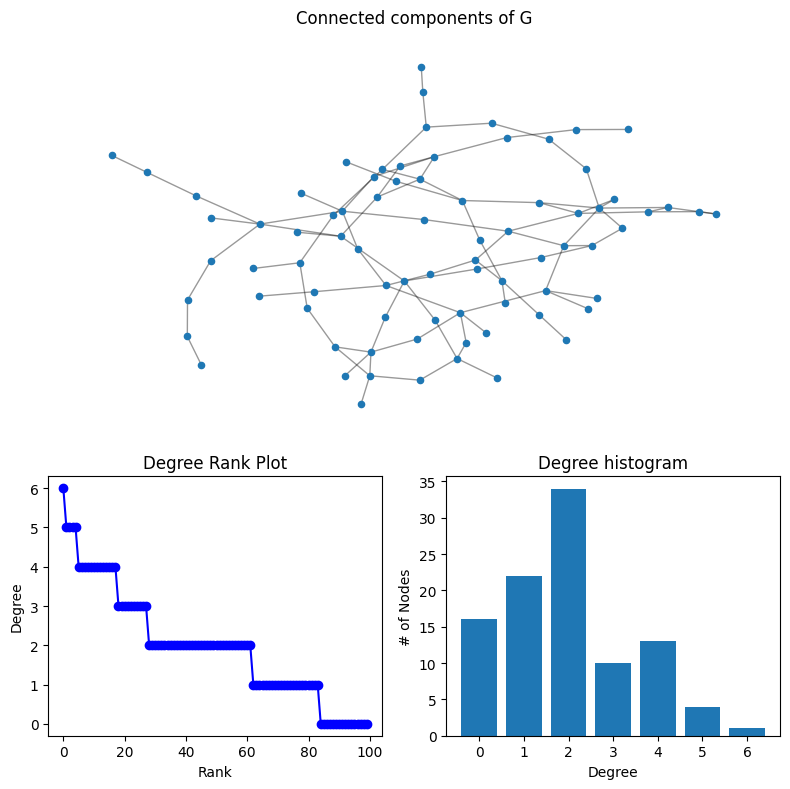

In [3]:
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html#sphx-glr-auto-examples-drawing-plot-degree-py

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.gnp_random_graph(100, 0.02, seed=10374196)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

source vertex {target:length, }
0 {0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
3 {3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6} 
4 {4: 0, 5: 1, 3: 1, 6: 2, 0: 2, 1: 2, 2: 2, 7: 3, 8: 4, 9: 5} 
5 {5: 0, 4: 1, 6: 1, 3: 2, 7: 2, 0: 3, 1: 3, 2: 3, 8: 3, 9: 4} 
6 {6: 0, 5: 1, 7: 1, 4: 2, 8: 2, 3: 3, 9: 3, 0: 4, 1: 4, 2: 4} 
7 {7: 0, 6: 1, 8: 1, 5: 2, 9: 2, 4: 3, 3: 4, 0: 5, 1: 5, 2: 5} 
8 {8: 0, 7: 1, 9: 1, 6: 2, 5: 3, 4: 4, 3: 5, 0: 6, 1: 6, 2: 6} 
9 {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 0: 7, 1: 7, 2: 7} 

average shortest path length 2.86

length #paths
0 10
1 24
2 16
3 14
4 12
5 10
6 8
7 6
radius: 4
diameter: 7
eccentricity: {0: 7, 1: 7, 2: 7, 3: 6, 4: 5, 5: 4, 6: 4, 7: 5, 8: 6, 9: 7}
center: [5, 6]
periphery: [0, 1, 2, 9]
density: 0.26666666666666666


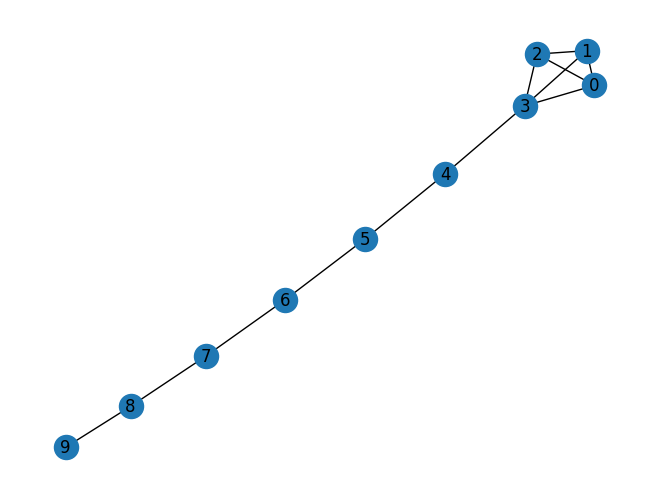

In [4]:
# basic properties
# https://networkx.org/documentation/stable/auto_examples/basic/plot_properties.html#sphx-glr-auto-examples-basic-plot-properties-py

import matplotlib.pyplot as plt
import networkx as nx

G = nx.lollipop_graph(4, 6)

pathlengths = []

print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print(f"{v} {spl} ")
    for p in spl:
        pathlengths.append(spl[p])

print()
print(f"average shortest path length {sum(pathlengths) / len(pathlengths)}")

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print()
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print(f"{d} {dist[d]}")

print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G)}")

pos = nx.spring_layout(G, seed=3068)  # Seed layout for reproducibility
nx.draw(G, pos=pos, with_labels=True)
plt.show()


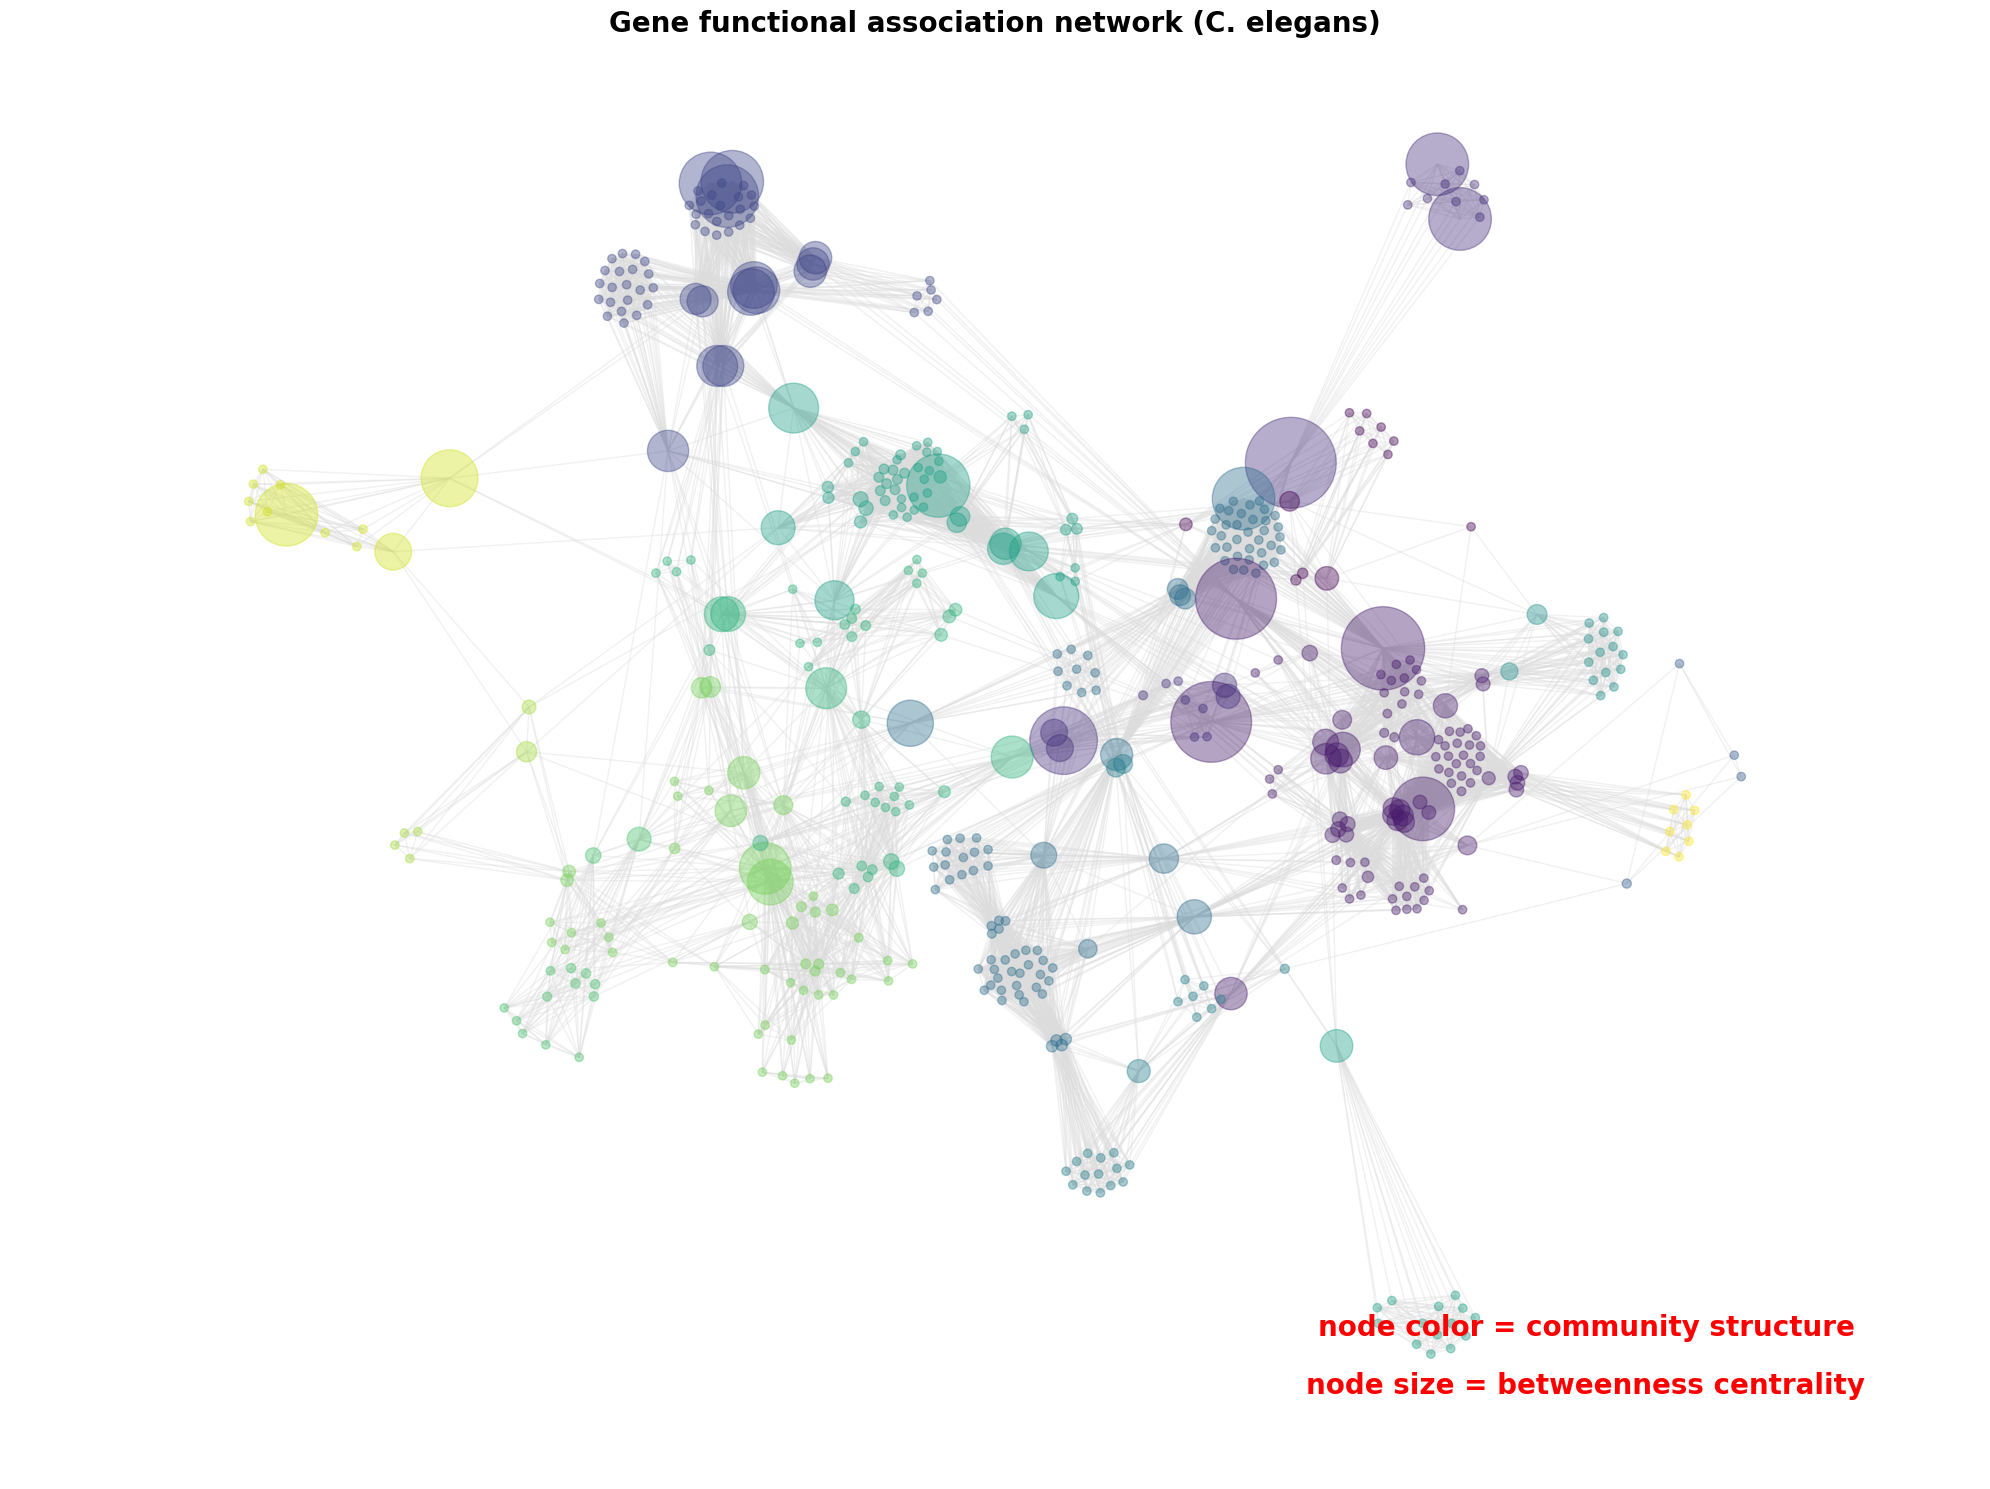

In [5]:
# betweenness Centrality
# https://networkx.org/documentation/stable/auto_examples/algorithms/plot_betweenness_centrality.html#sphx-glr-auto-examples-algorithms-plot-betweenness-centrality-py

from random import sample
import networkx as nx
import matplotlib.pyplot as plt

# Gold standard data of positive gene functional associations
# from https://www.inetbio.org/wormnet/downloadnetwork.php
G = nx.read_edgelist("WormNet.v3.benchmark.txt") # way faster
#G = nx.read_edgelist("bn.human.BNU.1.0025864.txt") # an example with brain networks from resonance imaging, takes a long time to run

# remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G) / 1.5)
nodes = sample(list(G.nodes), num_to_remove)
G.remove_nodes_from(nodes)

# remove low-degree nodes
low_degree = [n for n, d in G.degree() if d < 10]
G.remove_nodes_from(low_degree)

# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Gene functional association network (C. elegans)", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweenness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readability
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()


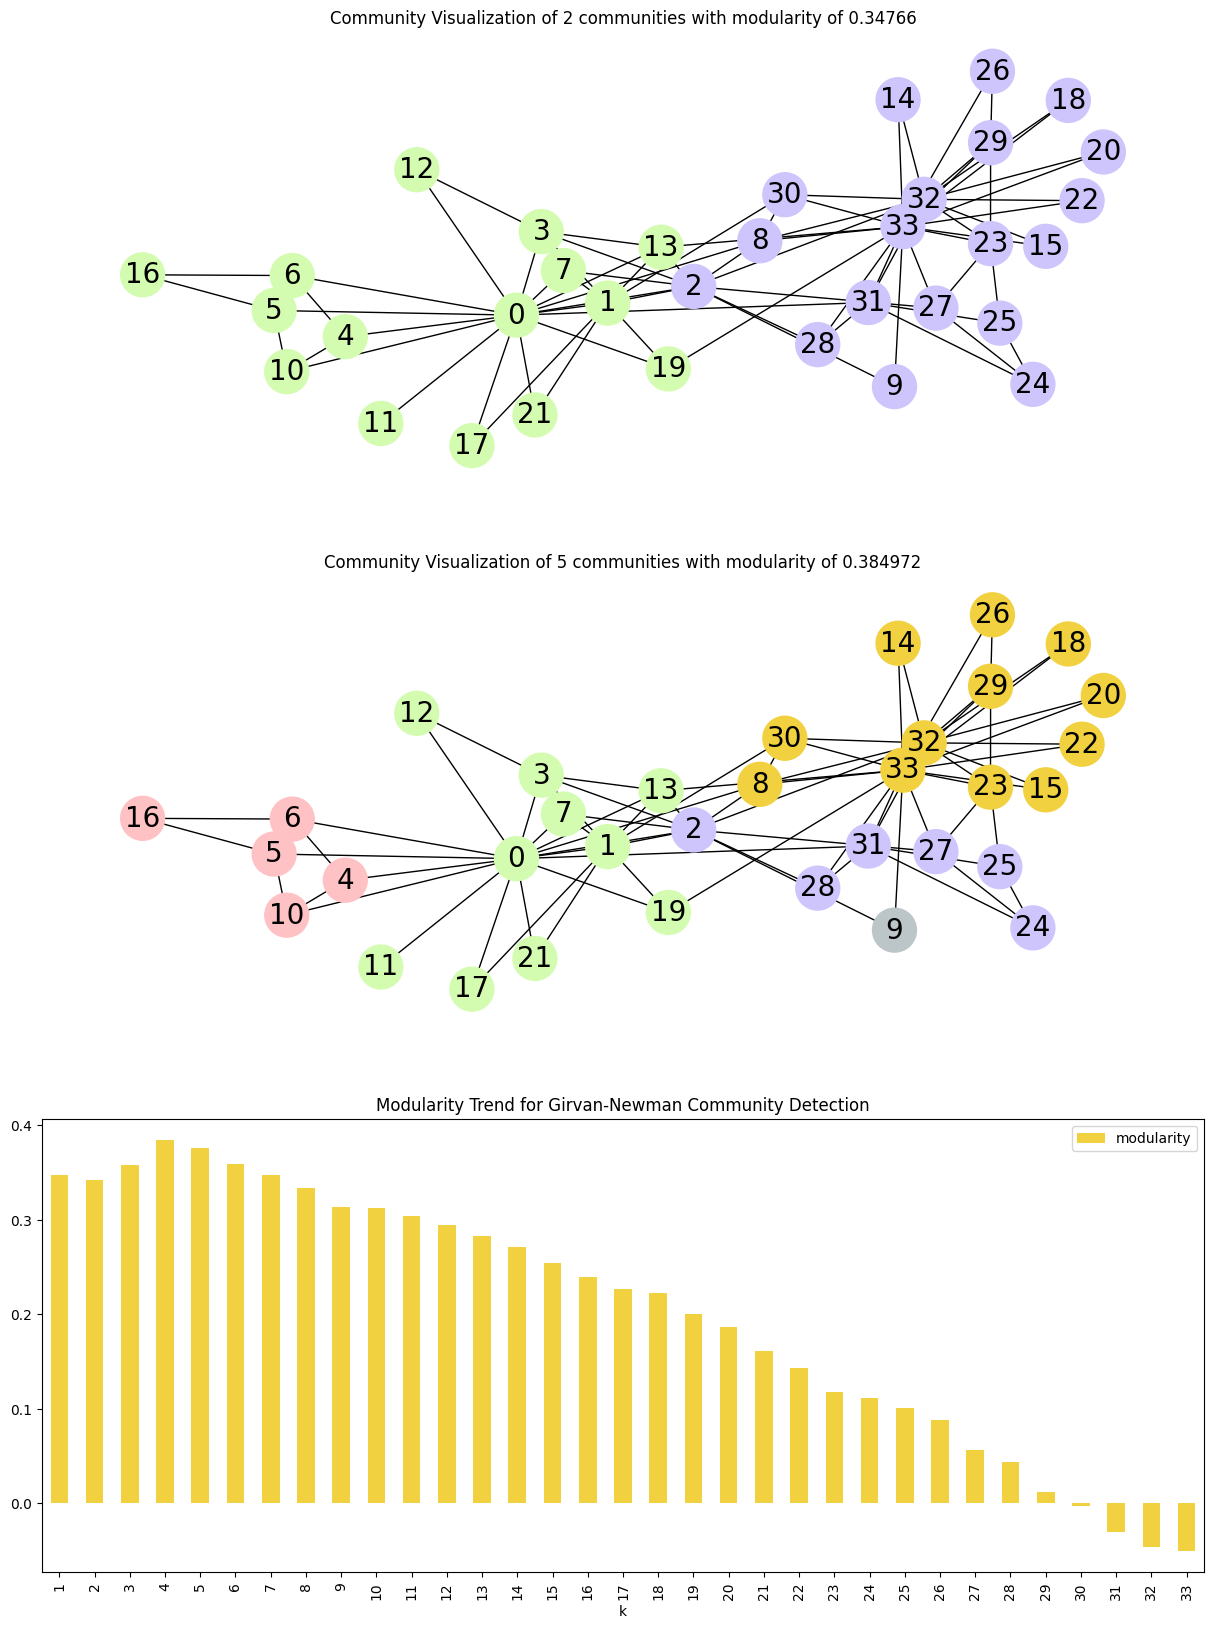

In [6]:
# community detection with Girvan-Newman
# https://networkx.org/documentation/stable/auto_examples/algorithms/plot_girvan_newman.html#sphx-glr-auto-examples-algorithms-plot-girvan-newman-py

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load karate graph and find communities using Girvan-Newman
G = nx.karate_club_graph()
communities = list(nx.community.girvan_newman(G))

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)


# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )


fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[3], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()

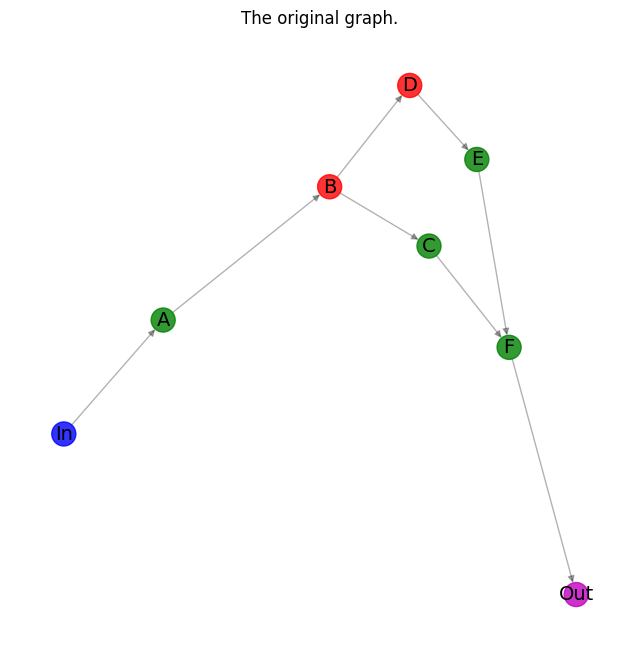

In [7]:
# subgraph partitioning
# https://networkx.org/documentation/stable/auto_examples/algorithms/plot_subgraphs.html#sphx-glr-auto-examples-algorithms-plot-subgraphs-py

import networkx as nx
import matplotlib.pyplot as plt


def graph_partitioning(G, plotting=True):
    """Partition a directed graph into a list of subgraphs that contain
    only entirely supported or entirely unsupported nodes.
    """
    # Categorize nodes by their node_type attribute
    supported_nodes = {n for n, d in G.nodes(data="node_type") if d == "supported"}
    unsupported_nodes = {n for n, d in G.nodes(data="node_type") if d == "unsupported"}

    # Make a copy of the graph.
    H = G.copy()
    # Remove all edges connecting supported and unsupported nodes.
    H.remove_edges_from(
        (n, nbr, d)
        for n, nbrs in G.adj.items()
        if n in supported_nodes
        for nbr, d in nbrs.items()
        if nbr in unsupported_nodes
    )
    H.remove_edges_from(
        (n, nbr, d)
        for n, nbrs in G.adj.items()
        if n in unsupported_nodes
        for nbr, d in nbrs.items()
        if nbr in supported_nodes
    )

    # Collect all removed edges for reconstruction.
    G_minus_H = nx.DiGraph()
    G_minus_H.add_edges_from(set(G.edges) - set(H.edges))

    if plotting:
        # Plot the stripped graph with the edges removed.
        _node_colors = [c for _, c in H.nodes(data="node_color")]
        _pos = nx.spring_layout(H)
        plt.figure(figsize=(8, 8))
        nx.draw_networkx_edges(H, _pos, alpha=0.3, edge_color="k")
        nx.draw_networkx_nodes(H, _pos, node_color=_node_colors)
        nx.draw_networkx_labels(H, _pos, font_size=14)
        plt.axis("off")
        plt.title("The stripped graph with the edges removed.")
        plt.show()
        # Plot the the edges removed.
        _pos = nx.spring_layout(G_minus_H)
        plt.figure(figsize=(8, 8))
        ncl = [G.nodes[n]["node_color"] for n in G_minus_H.nodes]
        nx.draw_networkx_edges(G_minus_H, _pos, alpha=0.3, edge_color="k")
        nx.draw_networkx_nodes(G_minus_H, _pos, node_color=ncl)
        nx.draw_networkx_labels(G_minus_H, _pos, font_size=14)
        plt.axis("off")
        plt.title("The removed edges.")
        plt.show()

    # Find the connected components in the stripped undirected graph.
    # And use the sets, specifying the components, to partition
    # the original directed graph into a list of directed subgraphs
    # that contain only entirely supported or entirely unsupported nodes.
    subgraphs = [
        H.subgraph(c).copy() for c in nx.connected_components(H.to_undirected())
    ]

    return subgraphs, G_minus_H


# example of directed graph
G_ex = nx.DiGraph()
G_ex.add_nodes_from(["In"], node_type="input", node_color="b")
G_ex.add_nodes_from(["A", "C", "E", "F"], node_type="supported", node_color="g")
G_ex.add_nodes_from(["B", "D"], node_type="unsupported", node_color="r")
G_ex.add_nodes_from(["Out"], node_type="output", node_color="m")
G_ex.add_edges_from(
    [
        ("In", "A"),
        ("A", "B"),
        ("B", "C"),
        ("B", "D"),
        ("D", "E"),
        ("C", "F"),
        ("E", "F"),
        ("F", "Out"),
    ]
)


# plot original graph
node_color_list = [nc for _, nc in G_ex.nodes(data="node_color")]
pos = nx.spectral_layout(G_ex)
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G_ex, pos, alpha=0.3, edge_color="k")
nx.draw_networkx_nodes(G_ex, pos, alpha=0.8, node_color=node_color_list)
nx.draw_networkx_labels(G_ex, pos, font_size=14)
plt.axis("off")
plt.title("The original graph.")
plt.show()

In [28]:
# study properties

# properties from networkx
print("Eccentricity: ", nx.eccentricity(G))
print("Diameter: ", nx.diameter(G))
print("Radius: ", nx.radius(G))
print("Preiphery: ", list(nx.periphery(G)))
print("Center: ", list(nx.center(G)))
print("Clustering: ", nx.clustering(G))

# function from https://www.kaggle.com/code/rahulgoel1106/graph-models-and-properties-using-networkx
def net_prop_dict(G): 
    prop_dict = {}

    prop_dict['no_of_nodes'] = nx.number_of_nodes(G)
    prop_dict['no_of_edges'] = nx.number_of_edges(G)
    if nx.is_connected(G):
        prop_dict['average_shortest_path_length'] = nx.average_shortest_path_length(G)
        prop_dict['diameter'] = nx.diameter(G)
    prop_dict['transitivity'] = nx.transitivity(G)
    prop_dict['average_clustering'] = nx.average_clustering(G)   
    prop_dict['edge_density'] = nx.classes.function.density(G)
    prop_dict['average_degree'] = np.array([d for n, d in G.degree()]).sum()/nx.number_of_nodes(G)
    prop_dict['total_triangles'] = np.array(list(nx.triangles(G).values())).sum()
    prop_dict['number_connected_components'] = nx.algorithms.components.number_connected_components(G)
    return prop_dict



Eccentricity:  {0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 4, 6: 4, 7: 4, 8: 3, 9: 4, 10: 4, 11: 4, 12: 4, 13: 3, 14: 5, 15: 5, 16: 5, 17: 4, 18: 5, 19: 3, 20: 5, 21: 4, 22: 5, 23: 5, 24: 4, 25: 4, 26: 5, 27: 4, 28: 4, 29: 5, 30: 4, 31: 3, 32: 4, 33: 4}
Diameter:  5
Radius:  3
Preiphery:  [14, 15, 16, 18, 20, 22, 23, 26, 29]
Center:  [0, 1, 2, 3, 8, 13, 19, 31]
Clustering:  {0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}


In [29]:
net_prop_dict(G)


{'no_of_nodes': 34,
 'no_of_edges': 78,
 'average_shortest_path_length': 2.408199643493761,
 'diameter': 5,
 'transitivity': 0.2556818181818182,
 'average_clustering': 0.5706384782076823,
 'edge_density': 0.13903743315508021,
 'average_degree': 4.588235294117647,
 'total_triangles': 135,
 'number_connected_components': 1}

In [ ]:
# TODO: interactive graphs!!! AND/OR Dynamic graphs